# Manipulação de Áudio.

#### Este projeto tem como finalidade mostrar a manipulação de áudio utilizando as seguintes bibliotecas de Python abaixo na descrição do índice.
#### Base de dados: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
#### A Base de dados possui uma vasta gama de áudios que podem ser convertidos em narrays - Diferentes atores gravaram áudios com diferentes emoções.
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Índice:
#### scipy
#### pandas
#### numpy
#### matplotlib
#### IPython

In [346]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython

## Demonstração de um áudio da Base da dados do Kaggle:

In [347]:
path = './kaggle/input/sample.wav'
rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em narray
IPython.display.Audio(path)

## Criar um DataFrame com os dados de áudio:

In [348]:
# Criar um DataFrame com os dados de áudio
df = pd.DataFrame({'Amostra': np.arange(len(audio_data)), 'Valor': audio_data})

# Exibir o DataFrame:
df

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
158553   158553      0
158554   158554      0
158555   158555      0
158556   158556      0
158557   158557      0

[158558 rows x 2 columns]

## 1) Tópico de Amplitude:

In [349]:
def fator_amplitude(dados, fator):
    return dados*fator

In [350]:
# Criar uma nova coluna do DataFrame para modificar a amplitude do áudio original (Multiplicar por algum fator -- Fator de multiplicação para aumentar a amplitude):
df['amplitude'] = fator_amplitude(df['Valor'], 7)
df['amplitude'] = df['amplitude'].astype(np.int16)
df

Amostra  Valor  amplitude
0             0      0          0
1             1      0          0
2             2      0          0
3             3      0          0
4             4      0          0
...         ...    ...        ...
158553   158553      0          0
158554   158554      0          0
158555   158555      0          0
158556   158556      0          0
158557   158557      0          0

[158558 rows x 3 columns]

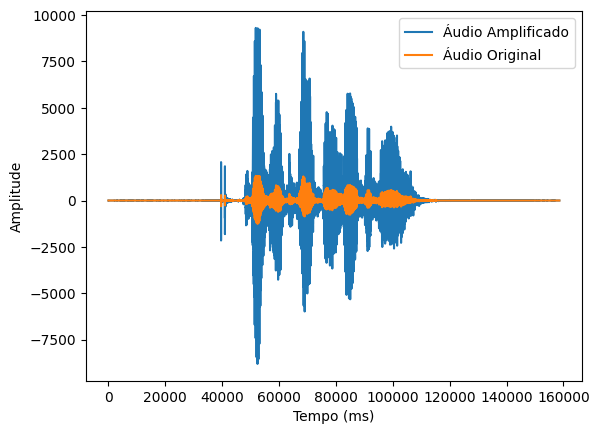

In [351]:
#Aumentar a amplitude => em aumentar o volume
plt.plot(df['Amostra'], df['amplitude'], label='Áudio Amplificado')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

#### Temos uma diferença na visualização dos dados de áudio em termos de amplitude, como mostrado no gráfico acima.

#### Áudio Original x Áudio Amplificado:

In [352]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

In [353]:
#Áudio Amplificado - Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo_amplificado.wav', rate, df['amplitude'])
IPython.display.Audio('audio_salvo_amplificado.wav')

#### Podemos concluir também que se aplicarmos um fator de amplitude que seja menor que o dos dados originais, obtemos um volume menor e portanto a saída de áudio será mais baixa.

# 2) Tópico de Frequência

#### Criando uma função para modificar a frequência dos áudios:

In [354]:
def nova_frequencia(frequencia, fator_multiplicativo):
    frequencia = int(frequencia*fator_multiplicativo)
    return frequencia

In [356]:
#Áudio original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

In [357]:
#Aumentar a frequência original por um fator de 2:
frequencia_2 = nova_frequencia(rate,2)
wavfile.write('audio_salvo_frequencia_2.wav', frequencia_2, df['Valor'])
IPython.display.Audio('audio_salvo_frequencia_2.wav')

In [358]:
#Diminuir a frequência original por um fator de 2:
frequencia_2 = nova_frequencia(rate,0.5)
wavfile.write('audio_salvo_frequencia_meia.wav', frequencia_2, df['Valor'])
IPython.display.Audio('audio_salvo_frequencia_meia.wav')

#### Podemos notar que ao modificar a frequência do áudio original, a resultante é um áudio mais acelerado e agudo, no caso de aumentar a frequência, e no caso de diminuir a frequência, temos um áudio mais grave e de maior duração em segundos.

## 3) Tópico de Função de Ruído

#### Criando a função de ruído:

In [359]:
def adicionar_ruido(audio_data, amplitude_ruido):
    ruido = np.random.uniform(-amplitude_ruido, amplitude_ruido, len(audio_data))
    return audio_data + ruido

In [360]:
# Adicionar o Rúido no DataFrame:
df['ruido'] = adicionar_ruido(df['Valor'], 500)
df['ruido'] = df['ruido'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df


Amostra  Valor  amplitude  ruido
0             0      0          0    321
1             1      0          0    -30
2             2      0          0    252
3             3      0          0     86
4             4      0          0   -279
...         ...    ...        ...    ...
158553   158553      0          0    343
158554   158554      0          0   -297
158555   158555      0          0   -211
158556   158556      0          0    -46
158557   158557      0          0   -165

[158558 rows x 4 columns]

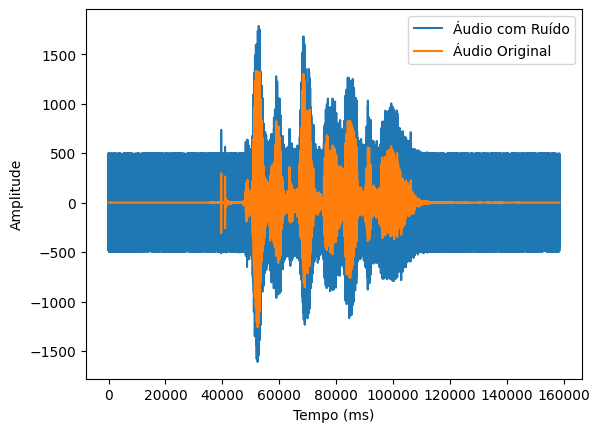

In [361]:
#Visualizar Ruídos:
plt.plot(df['Amostra'], df['ruido'], label='Áudio com Ruído')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

#### Áudio Original x Áudio com Ruído:

In [362]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

In [363]:
#Ouvir o ruído aleatório gerado:
wavfile.write('audio_salvo_ruido.wav', rate, df['ruido'])
IPython.display.Audio('audio_salvo_ruido.wav')

## 4) Tópico de Reversão de Áudio:

#### Criar a Reversão:

In [364]:
# Criar uma nova coluna do DataFrame do Áudio revertido:
df['reverso'] = df['Valor'].iloc[::-1].values
df

Amostra  Valor  amplitude  ruido  reverso
0             0      0          0    321        0
1             1      0          0    -30        0
2             2      0          0    252        0
3             3      0          0     86        0
4             4      0          0   -279        0
...         ...    ...        ...    ...      ...
158553   158553      0          0    343        0
158554   158554      0          0   -297        0
158555   158555      0          0   -211        0
158556   158556      0          0    -46        0
158557   158557      0          0   -165        0

[158558 rows x 5 columns]

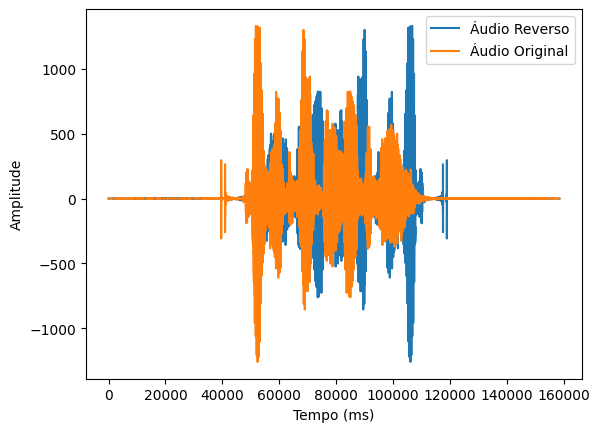

In [365]:
#Visualizar Reversão:
plt.plot(df['Amostra'], df['reverso'], label='Áudio Reverso')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [366]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

In [367]:
# Áudio Reverso:
wavfile.write('audio_salvo_reverso.wav', rate, df['reverso'])
IPython.display.Audio('audio_salvo_reverso.wav')

## 5) Comparar outros áudios (outros atores)

In [374]:
path = './kaggle/input/sample_3.wav'
rate_fem, audio_data_fem = wav.read(path) # Leitura do arquivo de áudio em narray
IPython.display.Audio(path)

In [375]:
# Criar um DataFrame com os dados de áudio
df_feminino = pd.DataFrame({'Amostra': np.arange(len(audio_data_fem)), 'Valor': audio_data_fem})

# Exibir o DataFrame do áudio feminino:
df_feminino

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
172968   172968      0
172969   172969      0
172970   172970      0
172971   172971      0
172972   172972      0

[172973 rows x 2 columns]

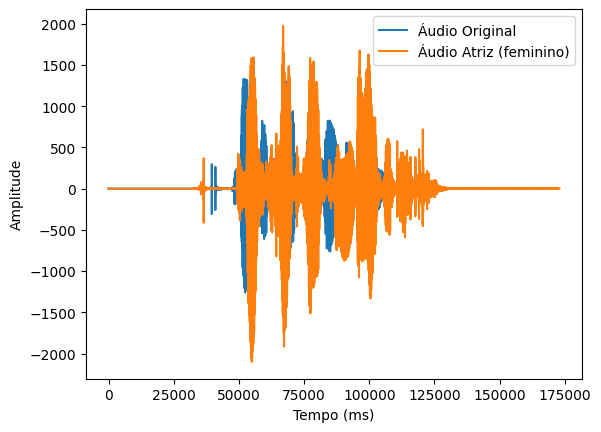

In [391]:
#Visualizar Comparação:
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.plot(df_feminino['Amostra'], df_feminino['Valor'], label='Áudio Atriz (feminino)')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [392]:
# Áudio Feminino advindo do DataFrame
wavfile.write('audio_salvo_feminino.wav', rate_fem, df_feminino['Valor'])
IPython.display.Audio('audio_salvo_feminino.wav')

In [393]:
# Somar as vozes Masculina e Feminina em uma nova coluna do DataFrame df:
df['soma_atores'] = df_feminino['Valor'] + df['Valor']
df['soma_atores'] = df['soma_atores'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df

Amostra  Valor  amplitude  ruido  reverso  soma  soma_atores
0             0      0          0    321        0     0            0
1             1      0          0    -30        0     0            0
2             2      0          0    252        0     0            0
3             3      0          0     86        0     0            0
4             4      0          0   -279        0     0            0
...         ...    ...        ...    ...      ...   ...          ...
158553   158553      0          0    343        0     0            0
158554   158554      0          0   -297        0     0            0
158555   158555      0          0   -211        0     0            0
158556   158556      0          0    -46        0     0            0
158557   158557      0          0   -165        0     0            0

[158558 rows x 7 columns]

In [394]:
# Áudio Soma Feminino + Masculino (mesma frequência):
wavfile.write('audio_salvo_soma_atores.wav', rate, df['soma'])
IPython.display.Audio('audio_salvo_soma_atores.wav')

## 6) Comparar outros áudios (outras emoções do mesmo ator)

In [396]:
# Áudio do mesmo ator do áudio original, só que com outra emoção!
path = './kaggle/input/sample_2.wav'
rate, audio_data_emocao = wav.read(path) # Leitura do arquivo de áudio em narray
IPython.display.Audio(path)

In [397]:
# Criar um DataFrame com os dados de áudio de outra emoção:
df_emocao = pd.DataFrame({'Amostra': np.arange(len(audio_data_emocao)), 'Valor': audio_data_emocao})

# Exibir o DataFrame do áudio feminino:
df_emocao

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
192187   192187      0
192188   192188      0
192189   192189      0
192190   192190      0
192191   192191      0

[192192 rows x 2 columns]

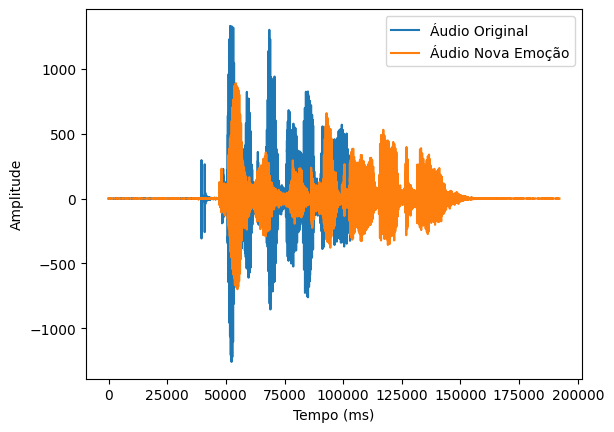

In [398]:
#Visualizar Comparação:
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.plot(df_emocao['Amostra'], df_emocao['Valor'], label='Áudio Nova Emoção')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [399]:
# Somar as vozes Masculina e Feminina em uma nova coluna do DataFrame df:
df['soma_emocao'] = df_emocao['Valor'] + df['Valor']
df['soma_emocao'] = df['soma_emocao'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df

Amostra  Valor  amplitude  ruido  reverso  soma  soma_atores  \
0             0      0          0    321        0     0            0   
1             1      0          0    -30        0     0            0   
2             2      0          0    252        0     0            0   
3             3      0          0     86        0     0            0   
4             4      0          0   -279        0     0            0   
...         ...    ...        ...    ...      ...   ...          ...   
158553   158553      0          0    343        0     0            0   
158554   158554      0          0   -297        0     0            0   
158555   158555      0          0   -211        0     0            0   
158556   158556      0          0    -46        0     0            0   
158557   158557      0          0   -165        0     0            0   

        soma_emocao  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
158553           -1  
158554            0  
158555            0  
158556           -1  
158557            0  

[158558 rows x 8 columns]

In [400]:
# Áudio Soma mesmo ator e emoções diferentes (mesma frequência):
wavfile.write('audio_salvo_soma_emocao.wav', rate, df['soma_emocao'])
IPython.display.Audio('audio_salvo_soma_emocao.wav')

- Fazer os metadados

# FIM.